# Graphing Repo For Distribution

<h2> Function to plot the normal distbution graph <h2>

In [ ]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import pandas as pd
import csv
from collections import defaultdict

<h3> The files Processing </h3>

In [ ]:
def process_csv(file,location=None):
    counter=defaultdict(int)
    df = pd.read_csv(file)
    if(location==None):
        raw=[i for i in df['Matching'].tolist()]
        for i in df['Matching'].tolist():
            counter[str(i)]+=1
    else:
        matching_scores=df['Matching'].tolist()
        raw=[matching_scores[i] for i in location]
        for i in location:
            counter[str(matching_scores[i])]+=1
    return [int(i) for i in counter.keys()],counter.values(),raw

<h3> the function for graphing </h3>

In [ ]:
class Distribution:
    @staticmethod
    #lower bound and upper bound are the actual matching score, not percentage
    def plot(x_axis:list, y_axis:list, raw,
            title=None, x_label=None, y_label=None, legend_label=None, legend_location="best"):
        title        = title        or "Matching Score Distribution"
        x_label      = x_label      or "Matching Scores"
        y_label      = y_label      or "Frequency/Occurance"
        legend_label = legend_label or "Benchmark Mean ={} Std = {}".format(int(np.mean(np.array(raw))),int(np.std(np.array(raw))))
        plt.title(title)
        plt.bar(x_axis, y_axis, 1/1.5, alpha=0.75,label=legend_label,log=True)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc=legend_location)
        return plt

In [23]:
clustered_attack_indices=sorted([i+(j*256) for i in range(129,256) for j in range(0,4)])
clustered_normal_indices=sorted([i+(j*256) for i in range(129) for j in range(0,4)])

nonclustered_attack_indices=sorted([25,281,537,793])
nonclustered_normal_indices=sorted([i for i in range(1024) if i not in nonclustered_attack_indices])

<h3> Distribution Graph </h3>

In [ ]:
x,y,r1=process_csv("Merge_Sort/Cluster/MergeSort_Cluster_500.csv",clustered_attack_indices) # change names accordingly
k,j,r2=process_csv("Merge_Sort/MergeSort_Distribution.csv")
plot=Distribution.plot(x,y,r1)
plot=Distribution.plot(k,j,r2)
plot.show()


<h3> Additional Mathematical Functions for Processing Data </h3>

In [27]:
# CALCULATING THE percision, recall, and accuracy, helper function, do not modify
def metrics(TP,FP,FN,TN,total):
    percision=TP/(TP+FP)
    recall=TP/(TP+FN)
    false_pos=FP/total
    accuracy=(TP+TN)/total

    return percision,recall,accuracy,false_pos

def decision_process(decision:list[bool],normal_loc:list[int],attack_loc:list[int]):

    # decision are raw data after decision processing
    # normal locations are iterations not attacked, in forms of index vector
    # attack_loc are iterations are attacked, in forms of index vector
    total=len(decision)
    TP,FP,FN,TN=0,0,0,0

    for i in attack_loc:
        if not decision[i]:
            TP+=1
        else:
            FN+=1
    
    for i in normal_loc:
        if decision[i]:
            TN+=1
        else:
            FP+=1
    
    return metrics(TP,FP,FN,TN,total)

In [ ]:
#This function calculates the threathold value for the program

def threathold(datafile:csv,length:int, legal_location=None,std=0):
    _,_,raw=process_csv(datafile,legal_location)
    return int(np.mean(np.array(raw)))-std*int(np.std(np.array(raw)))

# The function aims to redo all the decisions based on the std deviation for normal approach

def decisions (datafile: csv, threath: int) -> list[bool]:
    df = pd.read_csv(datafile)
    #print(len(df['Matching'].tolist()))
    return [(i>threath) for i in df['Matching'].tolist()]


In [ ]:
benchmarks=["Bellman", "bi_search", "DFS", "FW", "Huffman", "Kruskal", "LCS", "MergeSort", "Prim", "RabinKarp"]

samples_cluster={
    "Bellman":[200,250,350,450,500], 
    "bi_search": [200,250,300,350,400],
    "DFS": [i for i in range(100,351,50)],
    "FW":[i for i in range(200,351,50)], 
    "Huffman":[300,400,500,700,800,850], 
    "Kruskal":[100,250,350,400,450], 
    "LCS":[300,350,400,450,520], 
    "MergeSort": [500,600,700,800],
    "Prim":[200,250,300,350,400], 
    "RabinKarp":[100,150,250,400,500]
}

samples_noncluster={
    "Bellman":[250,350,450,500], 
    "bi_search": [250,300,350,400],
    "DFS": [i for i in range(200,351,50)],
    "FW":[i for i in range(250,351,50)], 
    "Huffman":[300,400,500,700,800,900], 
    "Kruskal":[100,250,350,400,450,500], 
    "LCS":[350,400,450,520], 
    "MergeSort": [500,700,800],
    "Prim":[250,300,350,400], 
    "RabinKarp":[100,250,400,500,600]
}

# Non Clustered

<h3> Graphing Accuracy Plots </h3>

In [34]:
result=[]
for i in benchmarks:
    th=threathold(f"{i}/Non-cluster/{i}_noncluster_{samples_noncluster[i][-1]}.csv",clustered_normal_indices)
    decision=decisions(f"{i}/Non-cluster/{i}_noncluster_{samples_noncluster[i][-1]}.csv",th)
    result.append(decision_process(decision,nonclustered_normal_indices,nonclustered_attack_indices)) # for each, the first is percision, recall, then accuracy,false pos
result=zip(benchmarks,result)
for i in result:
    print(i[0],i[1][2:])
    print()

Bellman (0.99609375, 0.00390625)

bi_search (0.9892578125, 0.0107421875)

DFS (0.8984375, 0.1015625)

FW (1.0, 0.0)

Huffman (0.926829268292683, 0.0702439024390244)

Kruskal (1.0, 0.0)

LCS (1.0, 0.0)

MergeSort (0.86328125, 0.1357421875)

Prim (0.953125, 0.046875)

RabinKarp (1.0, 0.0)



# Clustered

<h3> Graphing Accuracy Plots </h3>

In [33]:
result=[]
#print(benchmarks[4])
for i in benchmarks:
    th=threathold(f"{i}/Cluster/{i}_Cluster_{samples_cluster[i][-1]}.csv",clustered_normal_indices)
    decision=decisions(f"{i}/Cluster/{i}_Cluster_{samples_cluster[i][-1]}.csv",th)
    result.append(decision_process(decision,clustered_normal_indices,clustered_attack_indices)) # for each, the first is percision, recall, and then accuracy

result=zip(benchmarks,result)
for i in result:
    print(i[0],i[1][2:])
    print()

Bellman (0.9951171875, 0.0048828125)

bi_search (0.861328125, 0.1357421875)

DFS (0.953125, 0.046875)

FW (0.9931640625, 0.001953125)

Huffman (0.5205078125, 0.1396484375)

Kruskal (0.84375, 0.15625)

LCS (0.9990234375, 0.0009765625)

MergeSort (0.9658203125, 0.0341796875)

Prim (0.974609375, 0.0244140625)

RabinKarp (0.9052734375, 0.0947265625)



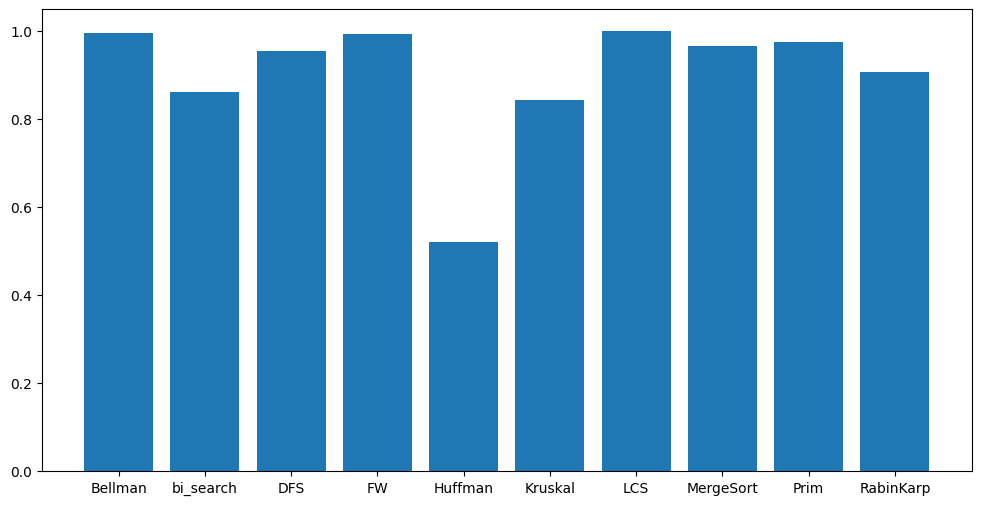

In [30]:
accu=[i[2] for i in result]
plt.figure(figsize=(12,6))
plt.bar(benchmarks, accu, align='center')
plt.show()

<h3> Graphing Percision Plots </h3>

In [ ]:
accu=[i[0] for i in result]
plt.figure(figsize=(12,6))
plt.bar(benchmarks, accu, align='center')
plt.show()

<h3> Graphing Recall Plots </h3>

In [ ]:
accu=[i[1] for i in result]
plt.figure(figsize=(12,6))
plt.bar(benchmarks, accu, align='center')
plt.show()